# Random Walk Generation

In [5]:
import numpy as np
import pandas as pd
def gbm(n_years=10,n_scenarios=1000,mu=0.07,sigma=0.15,steps_per_year=12,s_0=100.0):
    """
    Evolution of a stock price using a geometric brownian model
    """
    dt=1/steps_per_year
    n_steps =int(n_years*steps_per_year)
    xi= np.random.normal(size=(n_steps,n_scenarios))
    rets =mu*dt + sigma*np.sqrt(dt)*xi
    rets= pd.DataFrame(rets)
    # to prices
    prices= s_0*(1+rets).cumprod()
    return prices

In [6]:
p=gbm(10,n_scenarios=3)


In [7]:
p.shape

(120, 3)

In [8]:
p.head()

,0,1,2
0,100.601764,104.439761,103.235520
1,98.115540,104.785067,106.956408
2,102.566135,102.354081,95.672586
3,100.078224,108.269562,91.068403
4,101.015919,106.715696,85.274590


In [9]:
p=gbm(10,n_scenarios=3)
p.head() #you will get random answers.

,0,1,2
0,102.263647,100.857864,90.900561
1,106.182492,90.676396,84.623911
2,102.610512,87.292955,86.688554
3,104.882627,84.019213,81.895689
4,106.961585,86.334023,92.101477


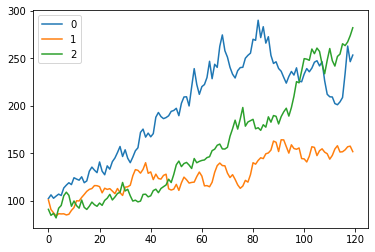

In [10]:
p.plot()

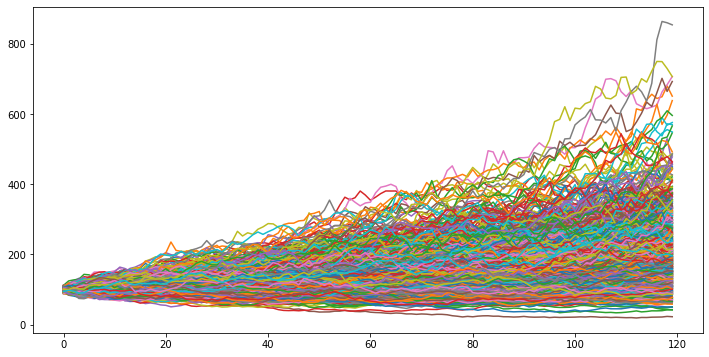

In [11]:
p=gbm(n_years=10,n_scenarios=1000).plot(figsize=(12,6),legend=False)

matplotlib is pretty slow. so we are going to make some changes to the code to make it more efficient.

In [19]:
def gbm(n_years=10,n_scenarios=1000,mu=0.07,sigma=0.15,steps_per_year=12,s_0=100.0):
    """
    Evolution of a stock price using a geometric brownian model
    """
    dt=1/steps_per_year
    n_steps =int(n_years*steps_per_year)
    xi= np.random.normal(size=(n_steps,n_scenarios))
    rets =mu*dt + sigma*np.sqrt(dt)*xi
    rets= pd.DataFrame(rets)
    # to prices
    prices= s_0*(1+rets).cumprod()
    return prices
    #just copy-pasting here

def gbm1(n_years=10,n_scenarios=1000,mu=0.07,sigma=0.15,steps_per_year=12,s_0=100.0):
    """
    Evolution of a stock price using a geometric brownian model
    """
    dt=1/steps_per_year
    n_steps =int(n_years*steps_per_year)
    rets_plus_1= np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size=(n_steps,n_scenarios))
    # to prices
    prices= s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices


## We are cutting down on the number of loops by effecient use of numpy and pandas. Loc is basically shifting our starting point from 0 to the specified value, basically adding. Scaling is multiplication. And since we don't use rets, a new variable rets_plus_one is used to account for the addition of one. 

In [16]:
%timeit gbm(n_years=5,n_scenarios=1000)

2.89 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%timeit gbm1(n_years=5,n_scenarios=1000) #we have reduced time here

2.39 ms ± 189 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


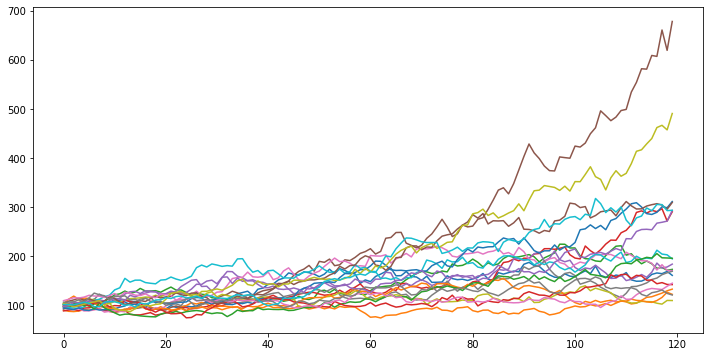

In [22]:
gbm1(n_years=10,n_scenarios=20).plot(figsize=(12,6),legend=False)

# We usually want to fix the value of stock as the initial stock price. So code can be mildly modified as shown below

In [23]:
def gbm1(n_years=10,n_scenarios=1000,mu=0.07,sigma=0.15,steps_per_year=12,s_0=100.0):
    """
    Evolution of a stock price using a geometric brownian model
    """
    dt=1/steps_per_year
    n_steps =int(n_years*steps_per_year)
    rets_plus_1= np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size=(n_steps,n_scenarios))
    rets_plus_1[0]=1#setting first return as 1 so that we get s_0 as our first value.
    # to prices
    prices= s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [24]:
gbm1(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,99.577530,105.809997,92.695350,101.225278,106.870068,100.288794,89.265628,102.855579,109.374453,99.477337
2,98.265565,99.498249,91.734230,101.659468,110.616198,104.360873,86.286061,102.699053,102.531032,97.629101
3,105.238132,99.431699,88.173309,101.865885,108.319218,99.460681,84.558706,96.209622,103.099499,94.659281
4,107.856019,108.413632,96.367195,107.568890,114.846604,101.439188,86.150303,98.391548,102.315959,100.995234


# Here, first value is 100=s_0